# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  The Gradient Descent (Single Variable)


In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
def g_descent(X, y, n_iter = 1000, lr = 0.001):
    n_obser = len(X)
    theta_zero, theta_one = 0, 0
    
    # Store Loss And Parameter Theta
    losess = []
    theta_all_zero = []
    theta_all_one = []
    
    for i in range(n_iter):
        # Store Theta Parameter
        theta_all_zero.append(theta_zero)
        theta_all_one.append(theta_one)

        # Model predict
        h = theta_zero + theta_one * X

        # Evaluation Error
        error_vector = h - y
        J = np.sum(error_vector ** 2) / (2 * n_obser)

        #Save Cost
        losess.append(J)

        # Calculate Gradient
        grade_zero = np.sum(error_vector) / n_obser
        grade_one = np.sum(error_vector * X) / n_obser

        # Calaculate Norm Of Grade
        norm_grade = np.linalg.norm(np.array([grade_zero, grade_one]))

        # Check Converge
        if norm_grade < 0.0001 or ((i != 0) and (abs(losess[i - 1] - J) < 0.0001)):
            break

        # Update Parameters
        theta_zero = theta_zero - lr * grade_zero
        theta_one = theta_one - lr * grade_one
        
    # Final Prediction
    y_pred = theta_zero + theta_one * X 
    return theta_zero, theta_one, theta_all_zero, theta_all_one, losess, y_pred

### Example

In [97]:
X = np.array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019, 6.9000001 , 6.0999999 , 6.19999981, 6. , 5.0999999 , 4.69999981, 4.4000001 , 5.80000019])
y = np.array([4., 7.4000001 , 5., 7.19999981, 7.9000001 ,6.0999999 , 6., 5.80000019, 5.19999981, 4.19999981,4. , 4.4000001 , 5.19999981])

In [98]:
t0, t1, at0, at1, c, h = gd_descent(X, y, n_iter=1000, lr=0.001)

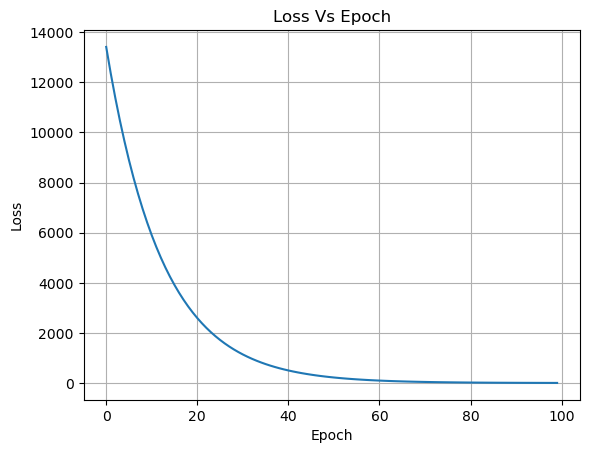

In [110]:
plt.plot(c[:100])
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.title("Loss Vs Epoch")
plt.grid()

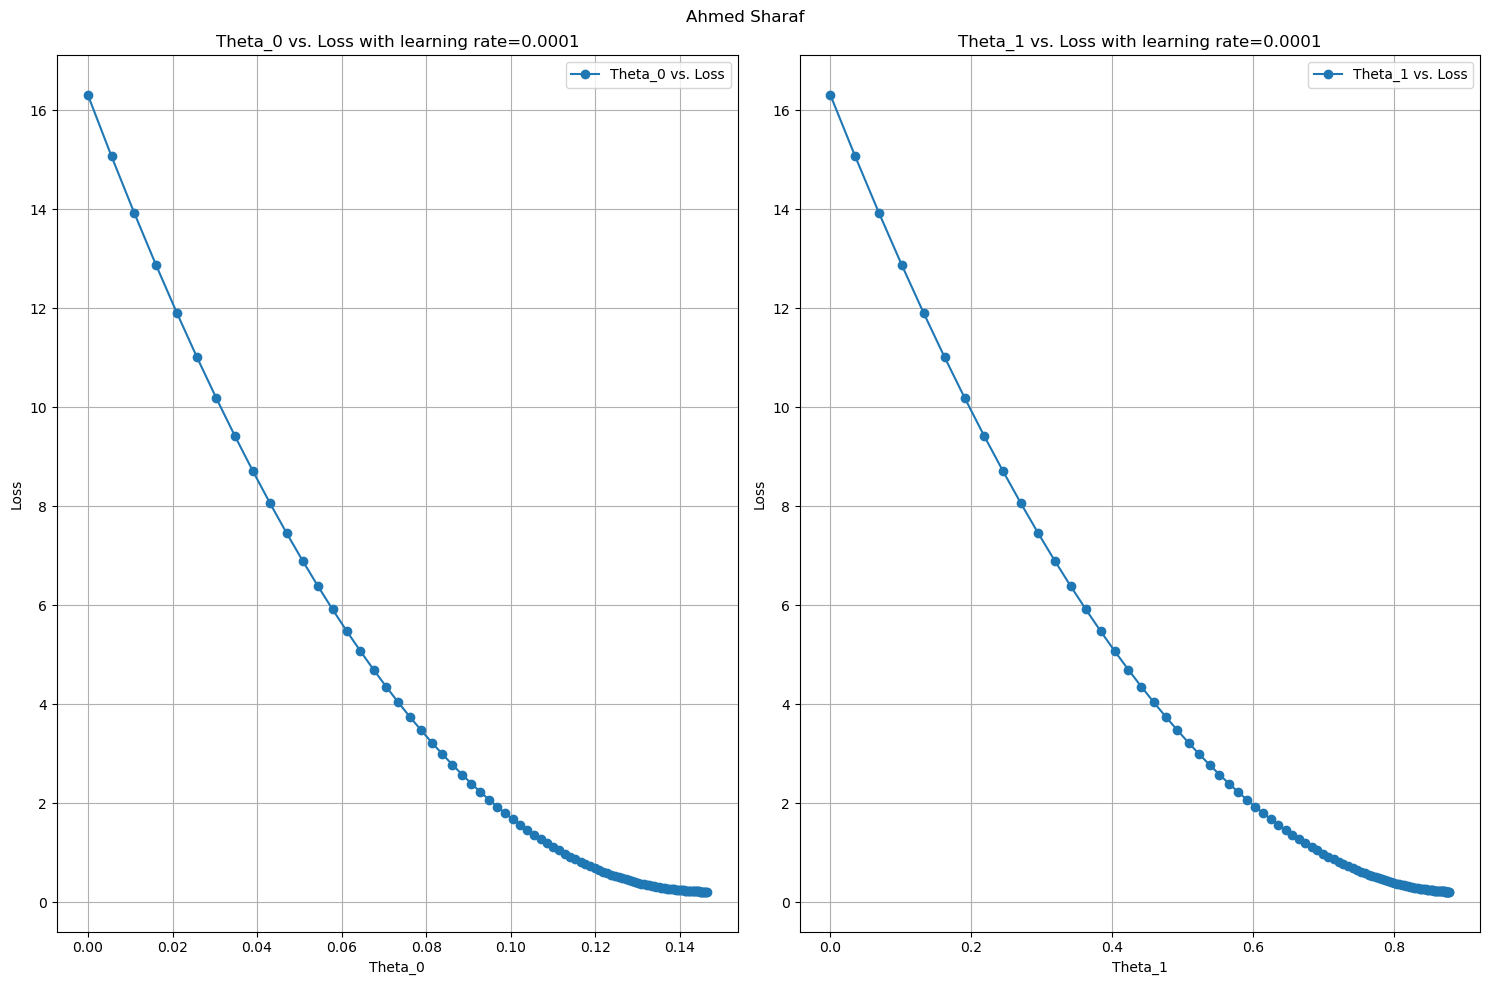

In [100]:
at = [at0, at1]
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Ahmed Sharaf')

for i in range(2):
    axs[i].plot(at[i][:100], c[:100], '-o', label=f'Theta_{i} vs. Loss')
    axs[i].set_title(f'Theta_{i} vs. Loss with learning rate=0.0001')
    axs[i].set_xlabel(f'Theta_{i}')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
    axs[i].grid(True)
        
fig.tight_layout()


### Example

###         2 - Implementation  The Gradient Descent (Multiple Variable)


In [101]:
def g_descent_mv(X, y, n_iter = 100000, lr = 0.0001):
    m = len(X)
    ones = np.ones((m,1))
    X2 = np.concatenate((ones,X),axis=1)
    y2 = y.reshape(-1, 1)
    
    thetas = np.zeros((X.shape[1] + 1, 1))

    losses = []
    all_thetas = []

    for i in range(n_iter):
        #Store Thetas
        all_thetas.append(thetas)

        #Model Predict
        h = X2@thetas

        # Eval Cost Function
        error_vector = h - y2
        J = np.sum(error_vector ** 2) / (2*m)
        losses.append(J)

        # Calculate Gradient Vector
        grade = (X2.T@error_vector) / m

        # Calculate Nome And Check
        norm_grade = np.linalg.norm(grade)
        if norm_grade < 0.2 or ((i != 0) and (abs(losses[i - 1] - J) < 0.000001)):
            break

        #Update Thetas
        thetas = thetas - lr * grade
        
    y_predict = X2@thetas
    return thetas, all_thetas, losses, y_predict

In [102]:
data = np.array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [103]:
X = data[:,:3]
y = data[:,3]

In [104]:
theta , at, c , h= g_descent_mv(X, y)

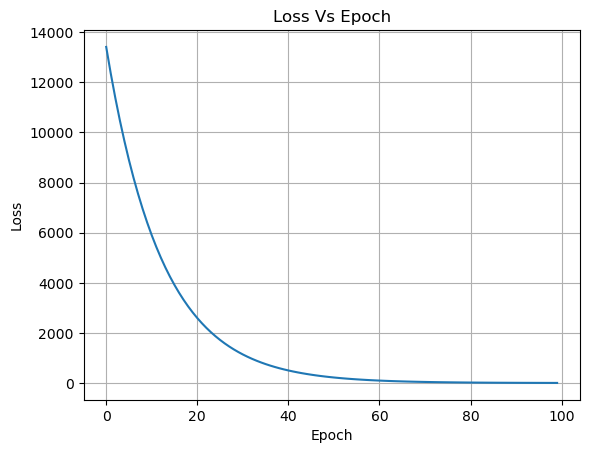

In [108]:
plt.plot(c[:100])
plt.xlabel("Epoch")
plt.ylabel("Loss");
plt.title("Loss Vs Epoch")
plt.grid()

In [106]:
theta_0 = np.array(at)[:, 0].reshape(-1, 1)
theta_1 = np.array(at)[:, 1].reshape(-1, 1)
theta_2 = np.array(at)[:, 2].reshape(-1, 1)
theta_3 = np.array(at)[:, 3].reshape(-1, 1)

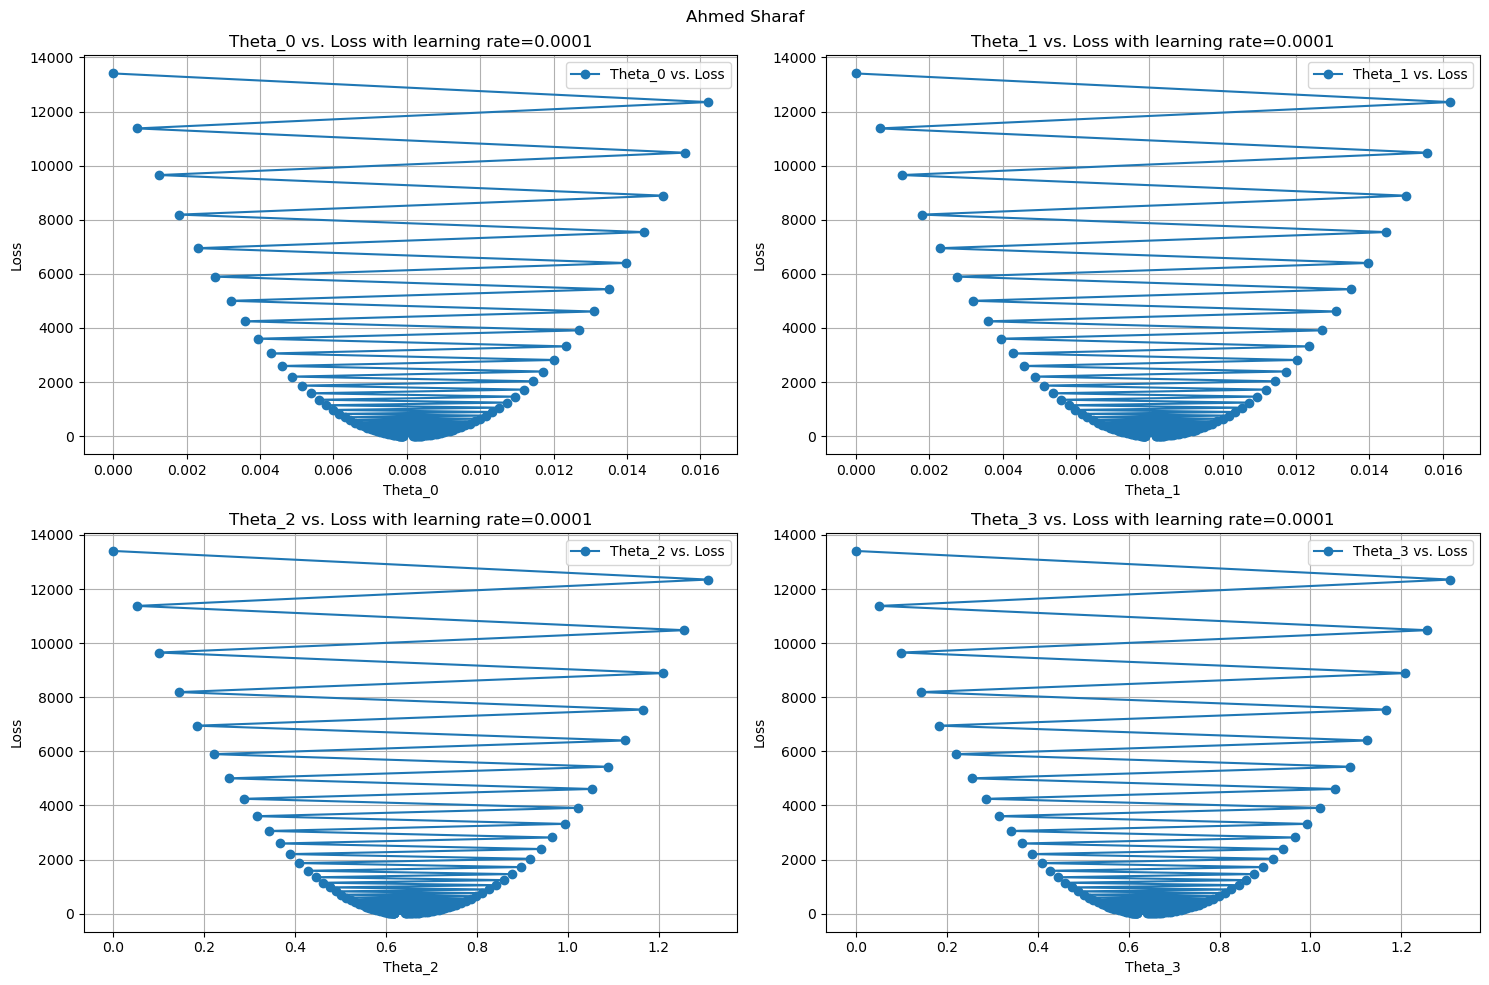

In [107]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle('Ahmed Sharaf')
theta_ = [theta_0, theta_1, theta_2, theta_3]
count = 0
for i in range(2):
    for j in range(2):
        axs[i, j].plot(theta_[i][:100], c[:100], '-o', label=f'Theta_{count} vs. Loss')
        axs[i, j].set_title(f'Theta_{count} vs. Loss with learning rate=0.0001')
        axs[i, j].set_xlabel(f'Theta_{count}')
        axs[i, j].set_ylabel('Loss')
        axs[i, j].legend()
        axs[i, j].grid(True)
        count += 1
        
fig.tight_layout()


# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  The Batch Gradient Descent 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions To Help Visualization

In [10]:

def theta_loss(at0, at1, c, lr):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    fig.suptitle('Ahmed Sharaf')
    theta = [at0, at1]
    for x in range(len(theta)):
        ax[x].plot(theta[x], c, '-o', label=f'Theta_{x} vs. Loss')
        ax[x].set_title(f'Theta_{x} vs. Loss with learning rate={lr}')
        ax[x].set_xlabel(f'Theta_{x}')
        ax[x].set_ylabel('Loss')
        ax[x].legend()
        ax[x].grid(True)
    fig.tight_layout()

def all_curve(X, y, at0, at1):
    plt.scatter(X, y);
    for x in range(len(at0)):
        y_pred = at0[x] + at1[x] * X
        plt.plot(X, y_pred,color='red')
    # final regression line
    plt.plot(X, y_pred, linewidth=2)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.grid(True)
    
def plt_best(X, y, y_pred):
    plt.scatter(X, y, label = "Data Point")
    plt.plot(X, y_pred, color = 'red', label = "Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Curve")
    plt.legend()
    plt.grid()
    
def loss_epoch(c):
    plt.plot(c, '-o',color='red')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.grid(True)
    
def vis(X, y, y_pred, at0, at1, c, lr):
    loss_epoch(c)
    theta_loss(at0, at1, c, lr)

In [6]:
def gradient_descent(X, y, lr = 0.001, itteration = 1000):
    m = len(X)
    cost = []
    all_theta_zero = []
    all_theta_one = []
    
    # step 1 - initialize parameter
    theta_zero, theta_one = 0, 0
    
    # iterate for converge
    while itteration:
        # store values theta
        all_theta_zero.append(theta_zero)
        all_theta_one.append(theta_one)
        
        # step 2 - model predict
        y_pred = theta_zero + theta_one * X
        
        # step 3 - Evaluate Error
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        #store current cost
        cost.append(J)
        
        # step 4 - calculate gradient
        grad_theta_zero = np.sum(error_vector) / m
        grad_theta_one = np.sum(error_vector * X) / m
        
        # calculate norm gradient
        grad_norm = np.linalg.norm(np.array([grad_theta_zero, grad_theta_one]))
        
        # step 5 - Check Converge
        if grad_norm < 0.001:
            break
        
        # step 6 - update parameter
        theta_zero = theta_zero - lr * grad_theta_zero
        theta_one = theta_one - lr * grad_theta_one
        itteration -= 1
        
    return theta_zero, theta_one, all_theta_zero, all_theta_one, cost

    

### Example 

In [7]:
X = np.linspace(0, 20)
y = -2 * X + 1 

In [8]:
t0, t1, at0, at1, c = gradient_descent(X, y, lr= 0.0005, itteration = 50)

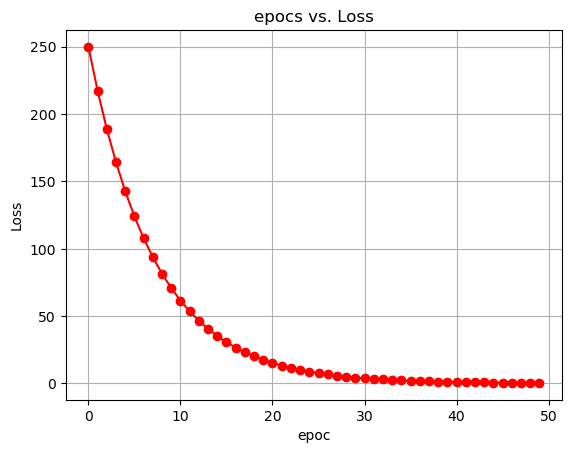

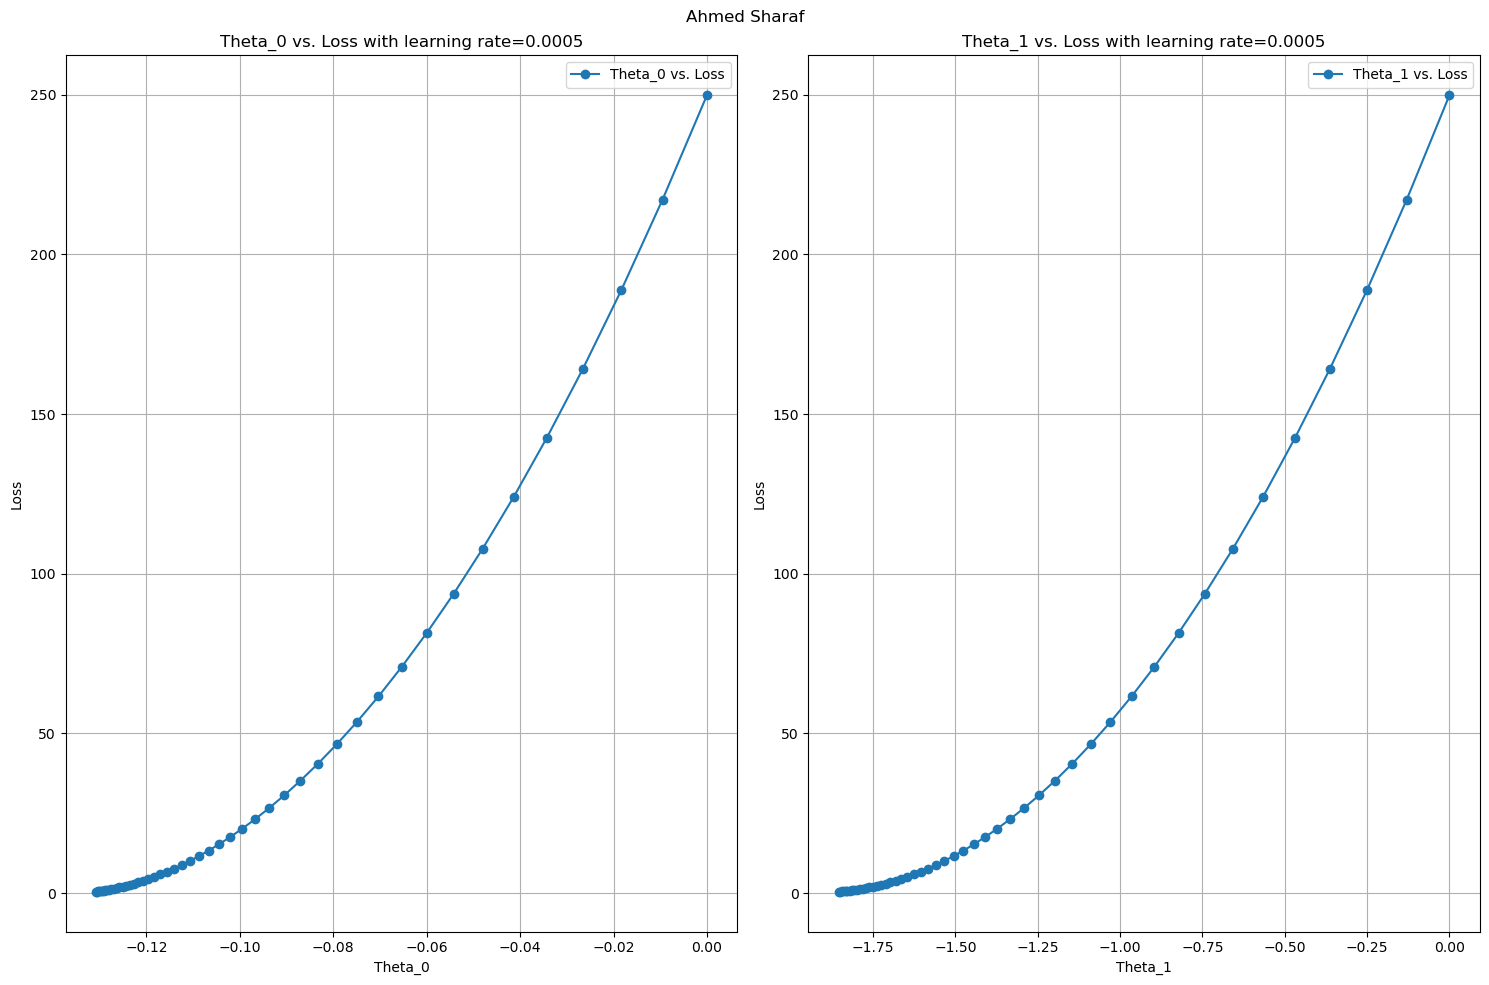

In [15]:
y_pred = t0 + t1 * X
vis(X,y,y_pred, at0,at1,c,0.0005)

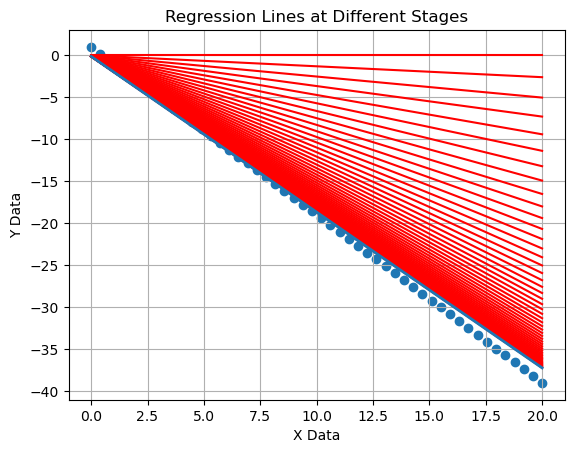

In [16]:
all_curve(X, y, at0, at1)

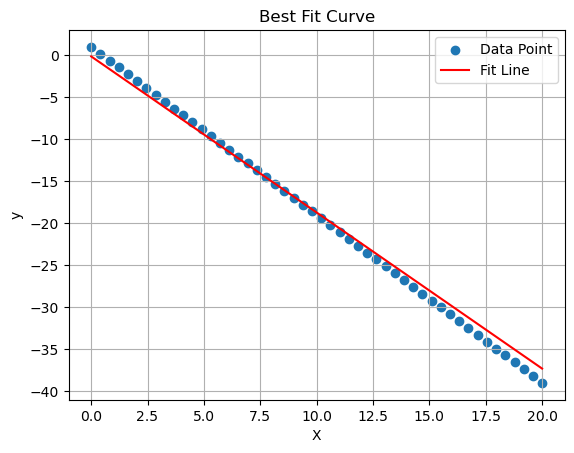

In [17]:
plt_best(X, y, y_pred)

###         2 - Implementation  The Stochastic Gradient Descent 

In [18]:
from sklearn.utils import shuffle

def SGD(x, y_, lr = 0.01, epoch = 1000):
    np.random.seed(101)
    alldata = np.column_stack((x, y_))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    for i in range(epoch):
        for j in range(m):
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)
            y_pred = theta_0 + theta_1 * X[j]
            error = y_pred - y[j]
            J = (error ** 2) / 2
            losses.append(J)
            grad_0 = error
            grad_1 = error * X[j]
            norm = np.linalg.norm(np.array([grad_0, grad_1]))
            if norm < 0.001:
                return theta_0, theta_1, theta_0_all, theta_1_all, losses
            theta_0 = theta_0 - lr * grad_0
            theta_1 = theta_1 - lr * grad_1
        # Convergence check
        if ((i > 1) and (abs(losses[- 1] - losses[-(m+1)]) < 0.001)):
            break
    return theta_0, theta_1, theta_0_all, theta_1_all, losses

In [19]:
theta_0,theta_1, theta_0_all, theta_1_all, losses  = SGD(X,y,0.0005,300)
y_pred = t0 + t1 * X

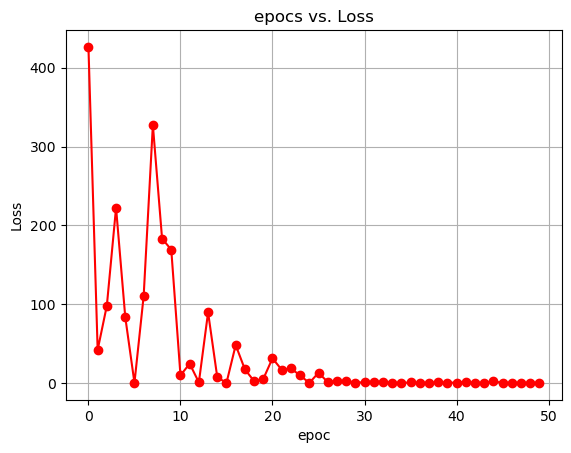

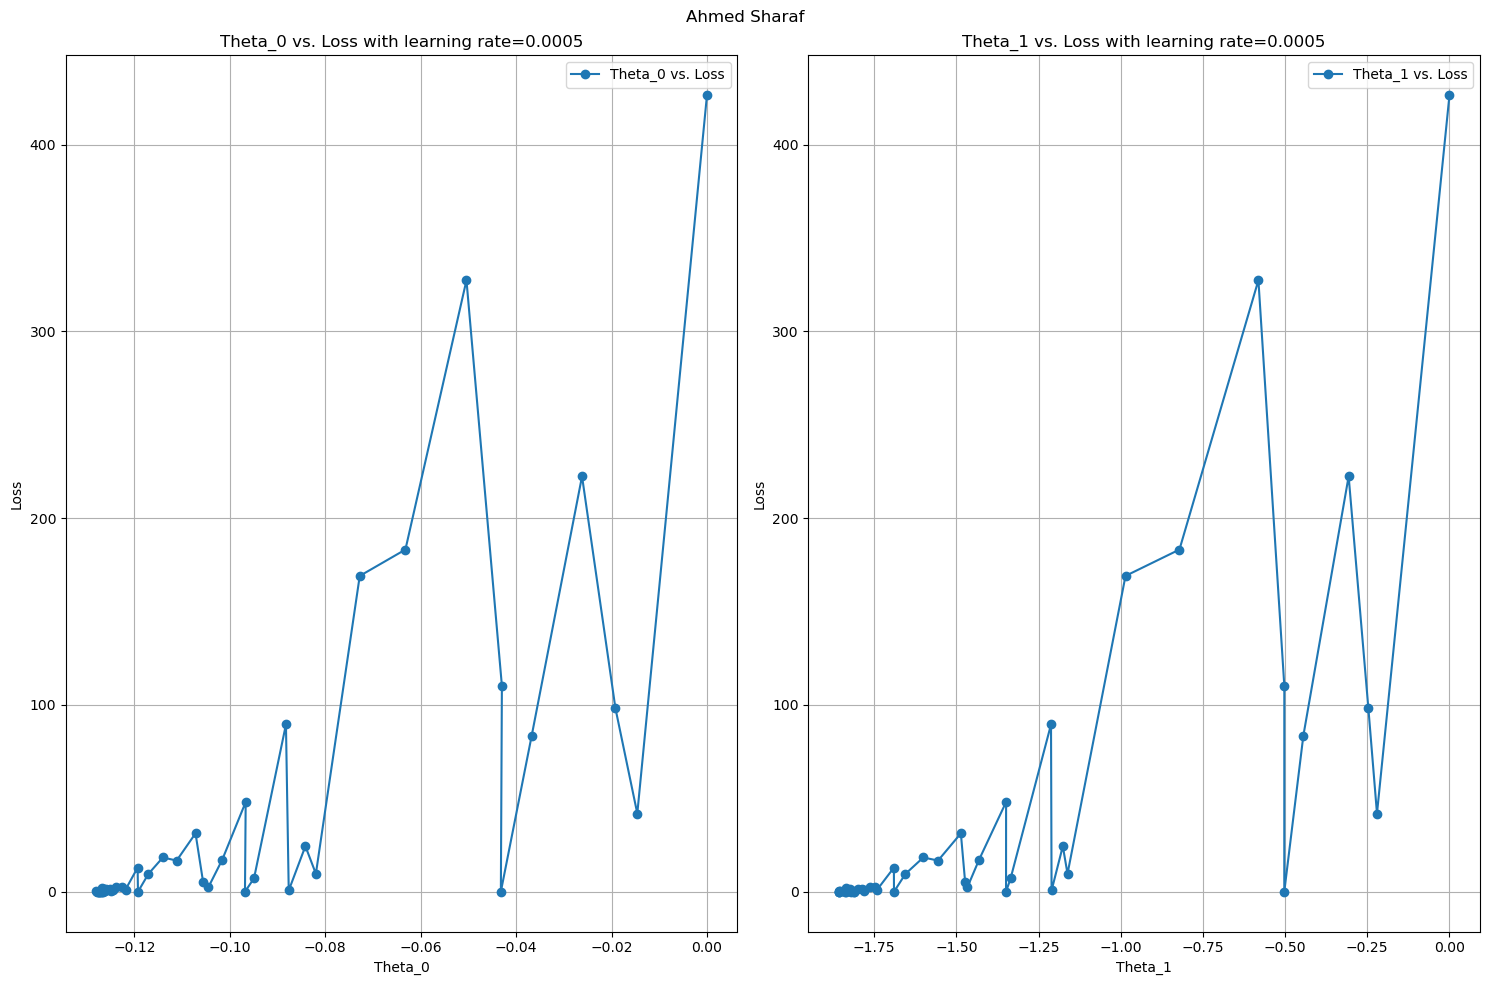

In [24]:
vis(X, y, y_pred, theta_0_all[:50], theta_1_all[:50], losses[:50], 0.0005)

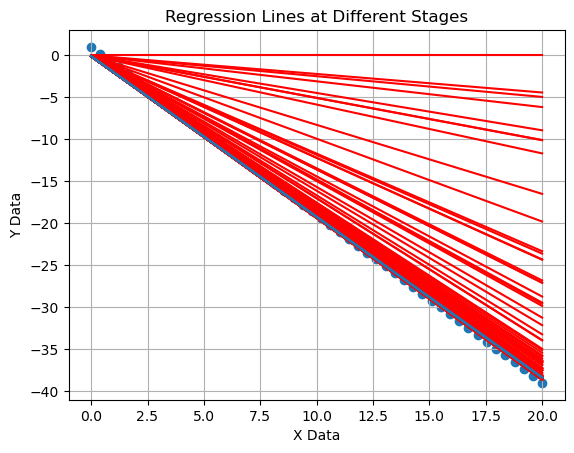

In [29]:
all_curve(X, y, theta_0_all, theta_1_all)

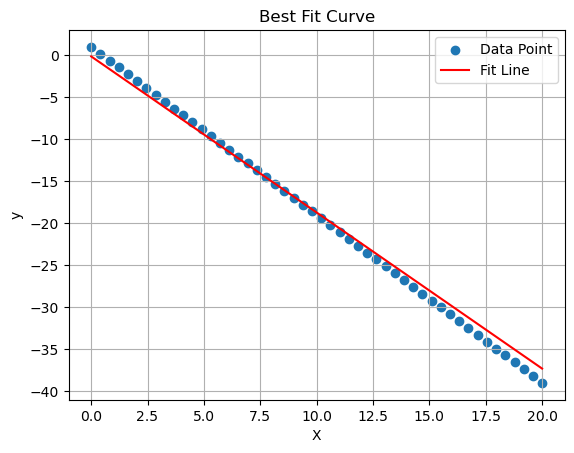

In [27]:
plt_best(X, y, y_pred)

###         3 - Implementation  The Mini-Batch Gradient Descent 

In [30]:
from sklearn.utils import shuffle

def MGD(x, y_, lr = 0.1, epoch = 1000, b = 32):
    np.random.seed(101)
    alldata = np.column_stack((x, y_))
    alldata = shuffle(alldata)
    X = alldata[:, :-1].flatten()
    y = alldata[:, -1]    
    m = len(X)
    
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    
    number_of_batches = m // b

    for i in range(epoch):
        for j in range(number_of_batches):
            start = j * b
            end = start + b
            theta_0_all.append(theta_0)
            theta_1_all.append(theta_1)
            y_pred = theta_0 + theta_1 * X[start:end]
            error = y_pred - y[start:end]
            J = np.sum(error ** 2) / (2 * b)
            losses.append(J)
            grad_0 = np.sum(error) / b
            grad_1 = np.sum(error * X[start:end]) / b
            norm = np.linalg.norm(np.array([grad_0, grad_1]))
            if norm < 0.1:
                return theta_0, theta_1, theta_0_all, theta_1_all, losses
            theta_0 = theta_0 - lr * grad_0
            theta_1 = theta_1 - lr * grad_1
        
    return theta_0, theta_1, theta_0_all, theta_1_all, losses

In [31]:
theta_0, theta_1, theta_0_all, theta_1_all, losses= MGD(X,y,0.0005,300,20)
y_pred = theta_0 + theta_1 * X

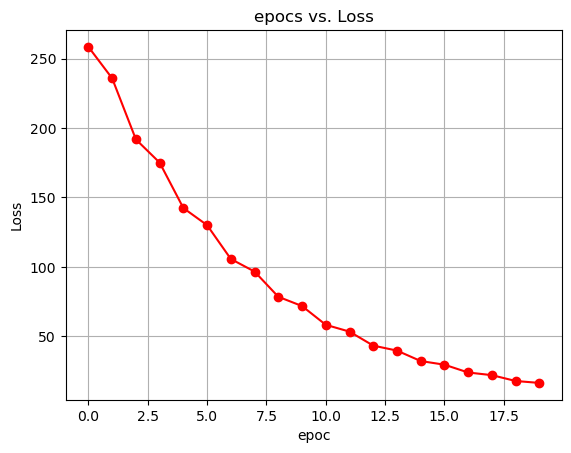

In [32]:
loss_epoch(losses[:20])

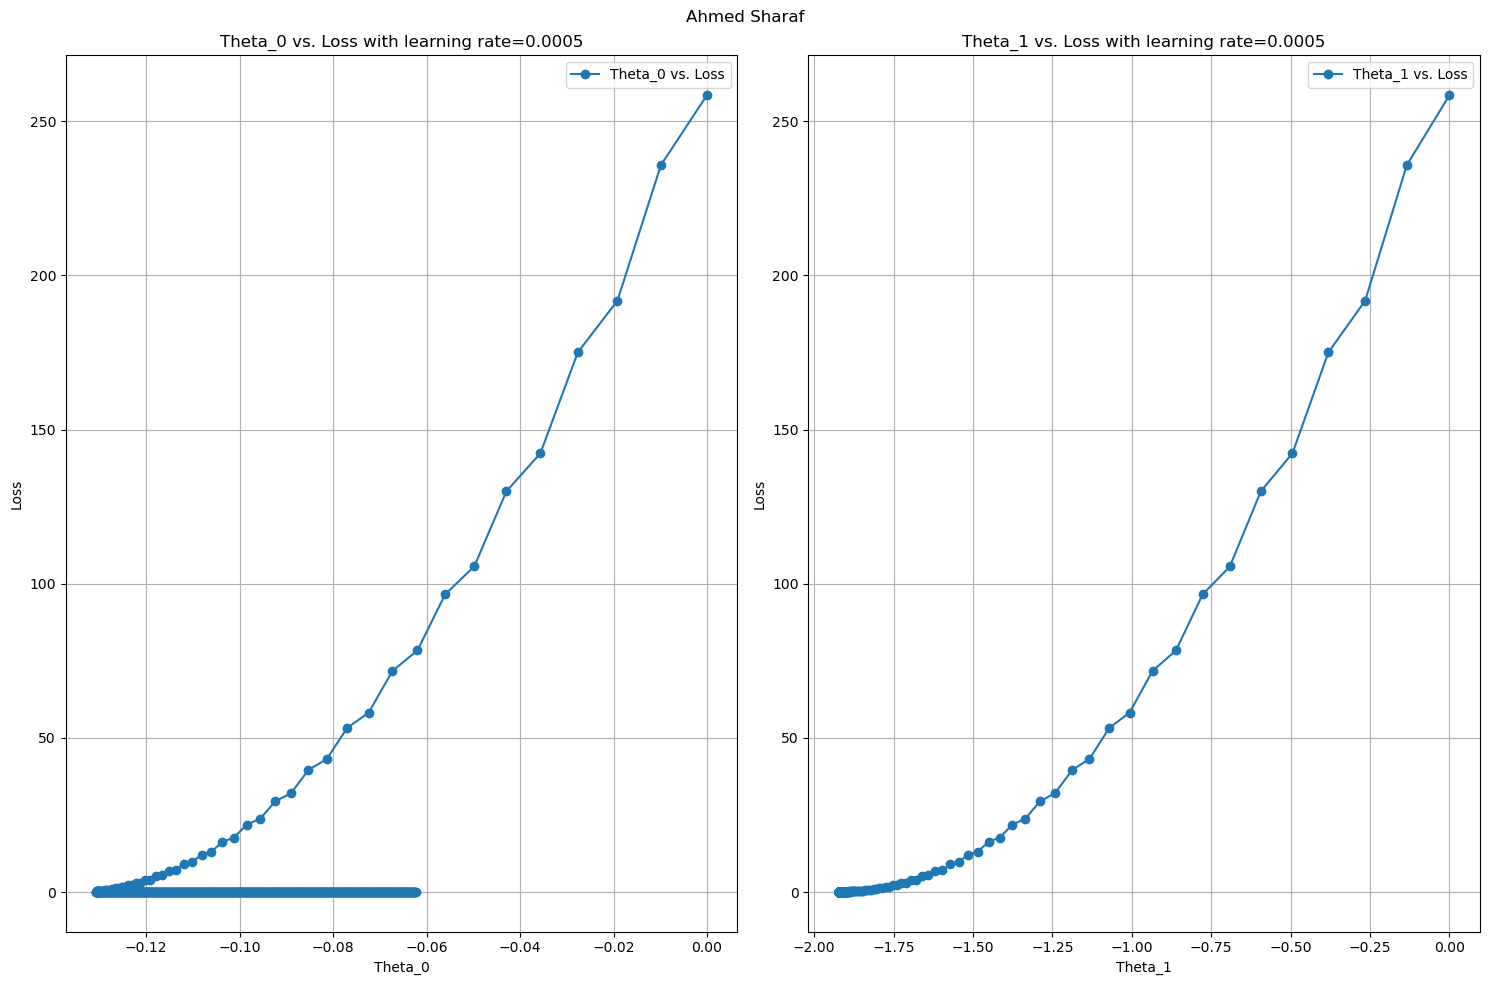

In [33]:
theta_loss(theta_0_all, theta_1_all, losses, 0.0005)

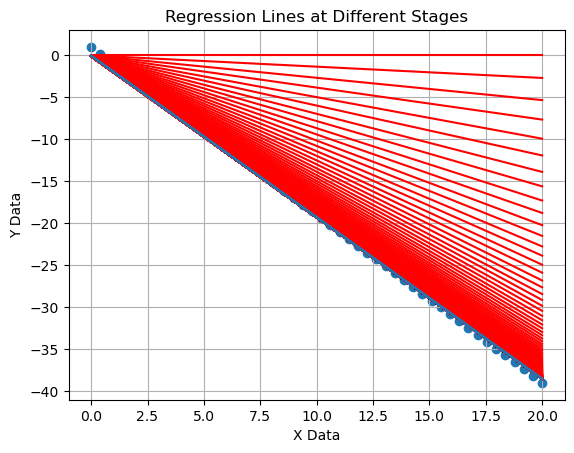

In [34]:
all_curve(X, y, theta_0_all, theta_1_all)

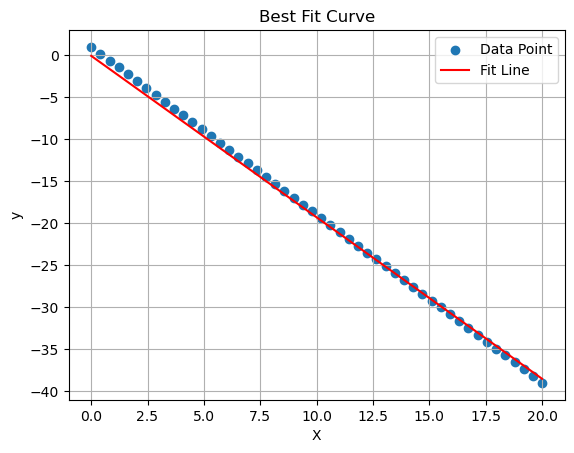

In [35]:
plt_best(X, y, y_pred)

# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  Momentum


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions To Help Visualization

In [4]:

def theta_loss(at0, at1, c, lr):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    fig.suptitle('Ahmed Sharaf')
    theta = [at0, at1]
    for x in range(len(theta)):
        ax[x].plot(theta[x], c, '-o', label=f'Theta_{x} vs. Loss')
        ax[x].set_title(f'Theta_{x} vs. Loss with learning rate={lr}')
        ax[x].set_xlabel(f'Theta_{x}')
        ax[x].set_ylabel('Loss')
        ax[x].legend()
        ax[x].grid(True)
    fig.tight_layout()

def all_curve(X, y, at0, at1):
    plt.scatter(X, y);
    for x in range(len(at0)):
        y_pred = at0[x] + at1[x] * X
        plt.plot(X, y_pred,color='red')
    # final regression line
    plt.plot(X, y_pred, linewidth=2)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.grid(True)
    
def plt_best(X, y, y_pred):
    plt.scatter(X, y, label = "Data Point")
    plt.plot(X, y_pred, color = 'red', label = "Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Curve")
    plt.legend()
    plt.grid()
    
def loss_epoch(c):
    plt.plot(c, '-o',color='red')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.grid(True)
    
def vis(X, y, y_pred, at0, at1, c, lr):
    loss_epoch(c)
    theta_loss(at0, at1, c, lr)

In [5]:
def momentum_GD(X, y, lr = 0.01, gamma = 0.9, itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        
            
        m_t_0 = gamma * m_t_0 + lr * theta_0_grad
        m_t_1 = gamma * m_t_1 + lr * theta_1_grad
        
        theta_0 = theta_0 - m_t_0
        theta_1 = theta_1 - m_t_1
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses

# Example

In [8]:
X = np.linspace(0,20)
y= -1 * X + 2


In [20]:
t0, t1, at0, at1, c = momentum_GD(X, y, lr = 0.0005, gamma = 0.9, itteration = 300)
y_pred = t0 + t1 * X

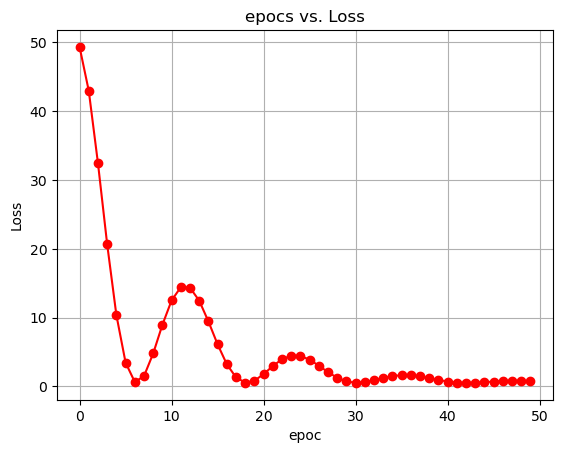

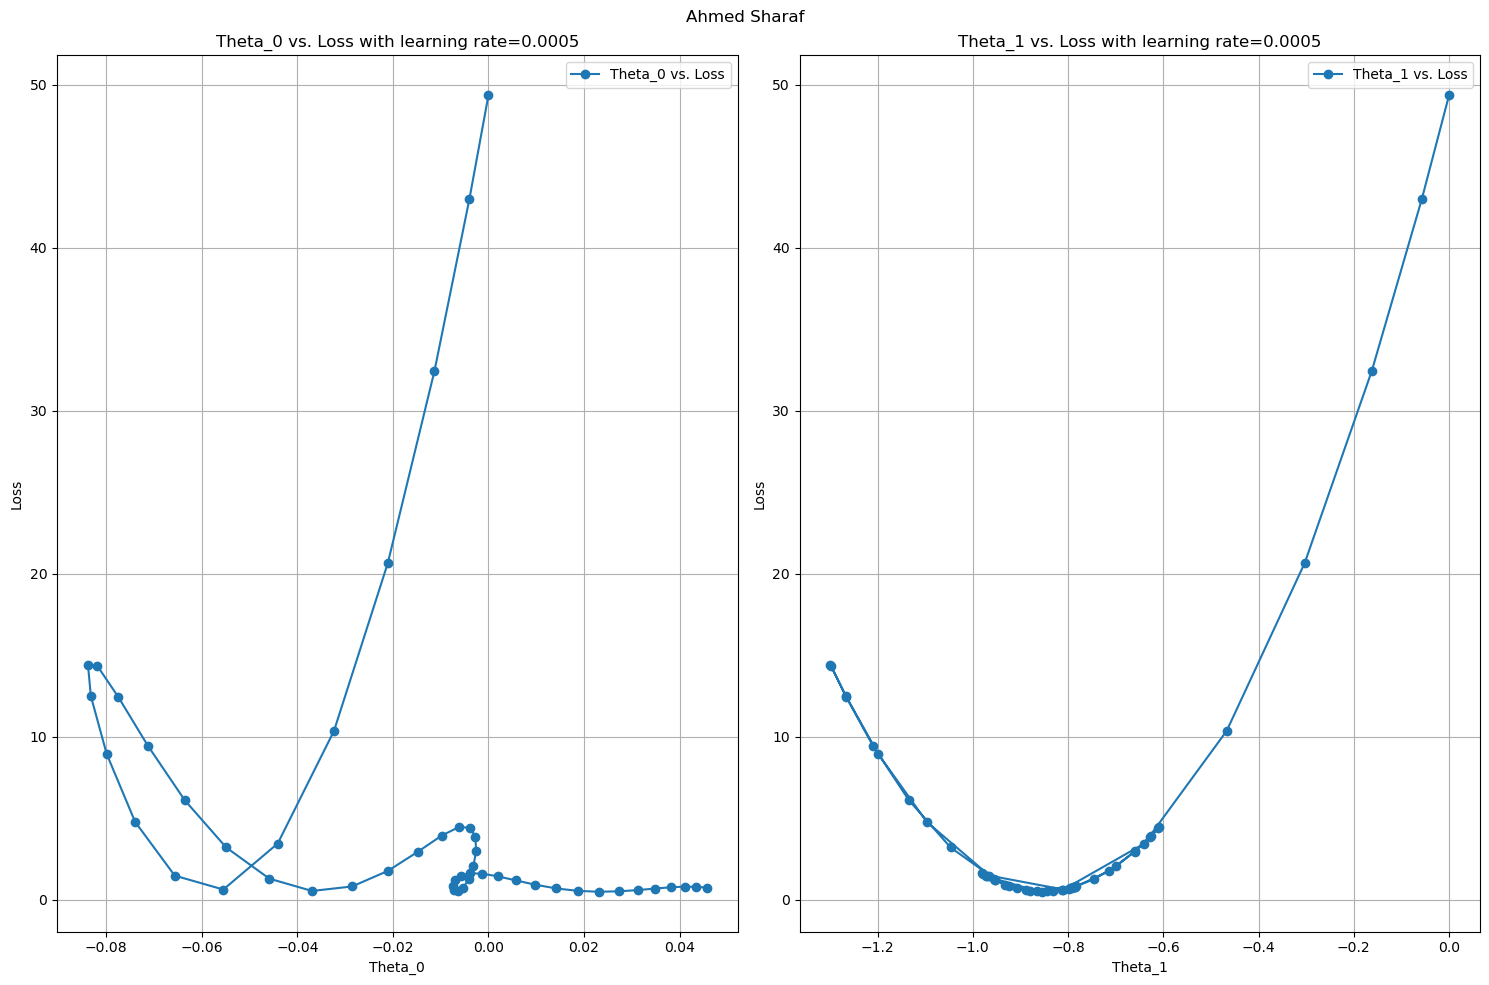

In [21]:
vis(X, y, y_pred, at0[:50], at1[:50], c[:50], 0.0005)

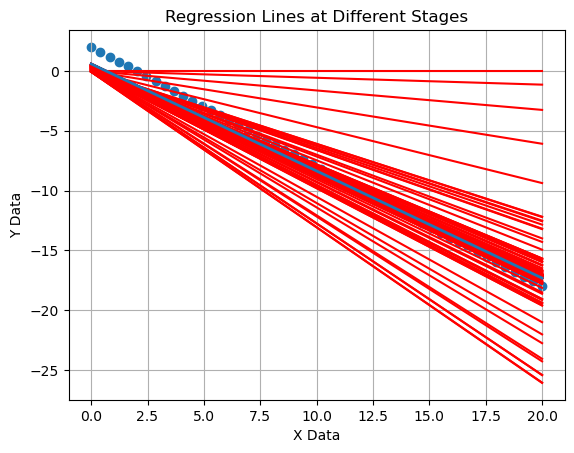

In [22]:
all_curve(X, y, at0, at1)

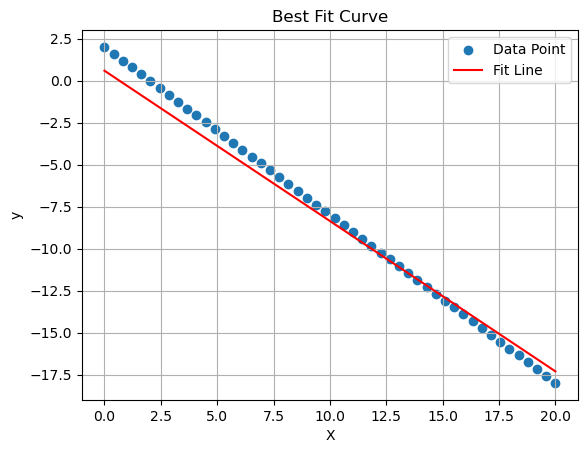

In [23]:
plt_best(X, y, y_pred)

###         2 - Implementation  NAG


In [24]:
def nag_GD(X, y, lr = 0.01, gamma = 0.9, itteration = 300):
    m = len(X)
    theta_0 = 0
    theta_1 = 0    
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        h = theta_0 + theta_1 * X
        error_vector = h - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        grad_0 = np.sum(error_vector) / m
        grad_1 = np.sum(error_vector * X) / m
        norm = np.linalg.norm(np.array([grad_0, grad_1]))
        if norm < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
        
        theta_t_0 = theta_0 - gamma * m_t_0
        theta_t_1 = theta_1 - gamma * m_t_1
        
        h = theta_t_0 + theta_t_1 * X
        d_theta_t_0 = np.sum((h - y)) / m
        d_theta_t_1 = np.sum((h - y) * X) / m
        
        m_t_0 = gamma * m_t_0 + lr * d_theta_t_0
        m_t_1 = gamma * m_t_1 + lr * d_theta_t_1
        
        theta_0 = theta_t_0 - lr * d_theta_t_0
        theta_1 = theta_t_1 - lr * d_theta_t_1

        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses

## Example

In [25]:
t0, t1, at0, at1, c = nag_GD(X, y, lr = 0.0005, gamma = 0.9)
y_pred = t0 + t1 * X

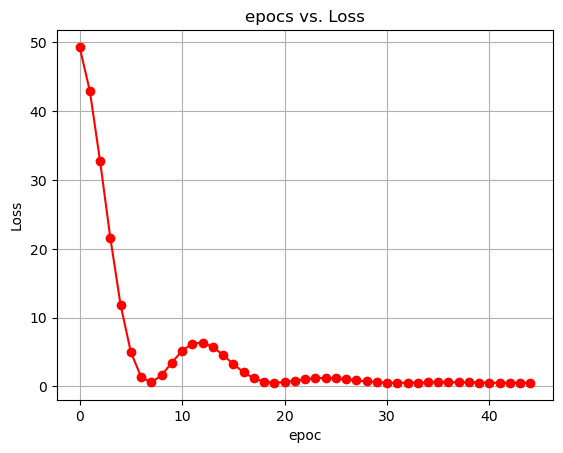

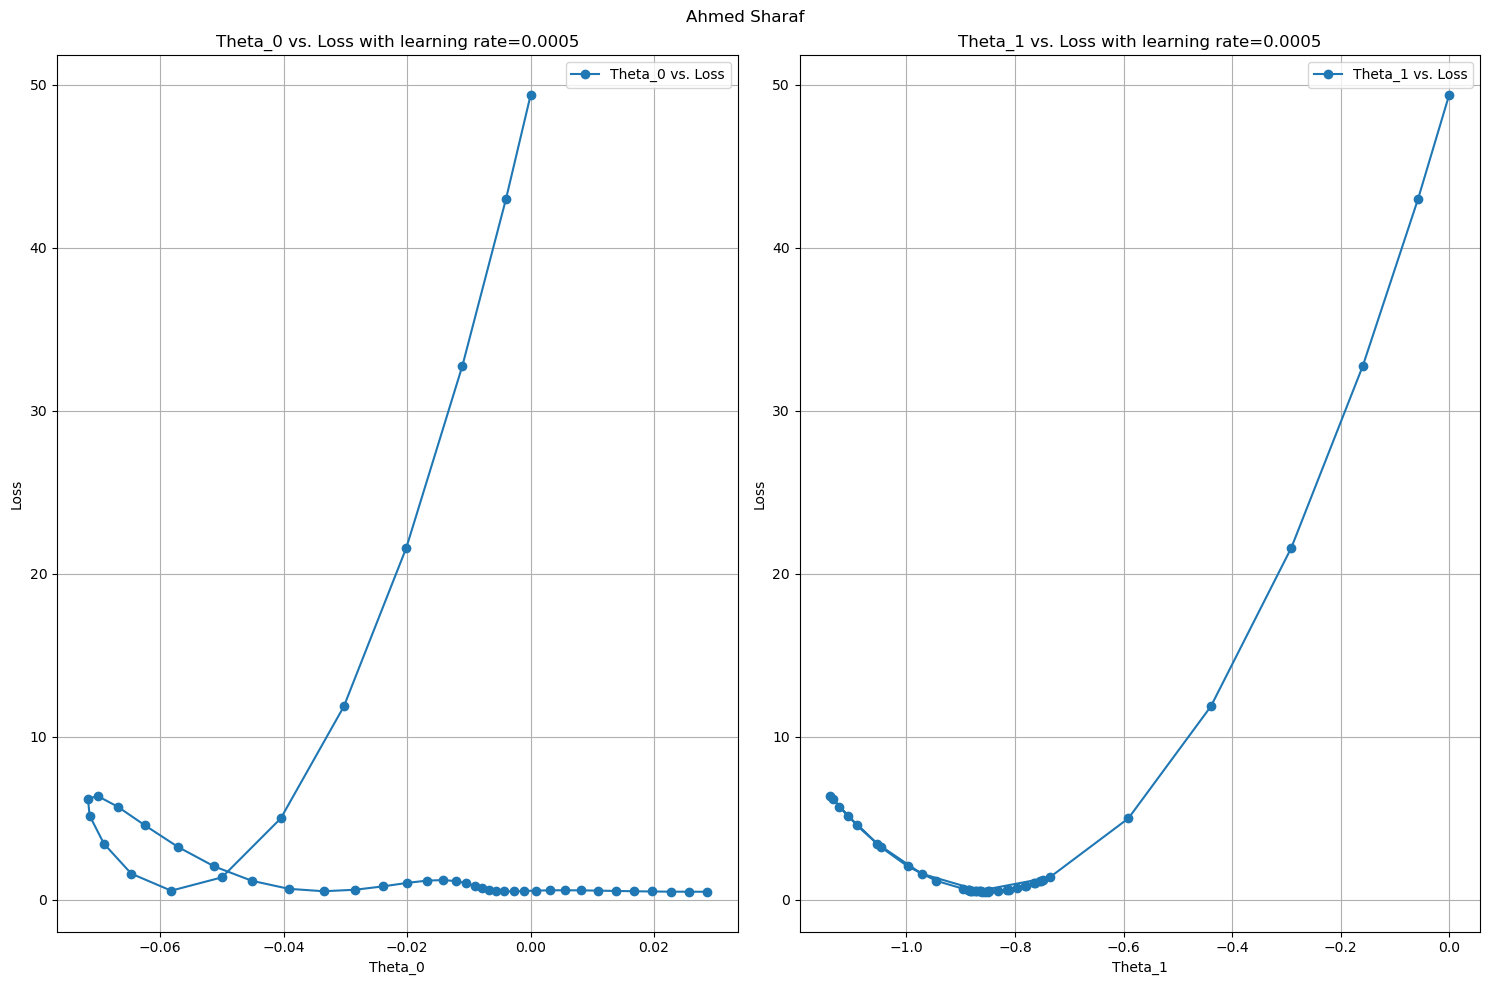

In [27]:
vis(X, y, y_pred, at0, at1, c, 0.0005)

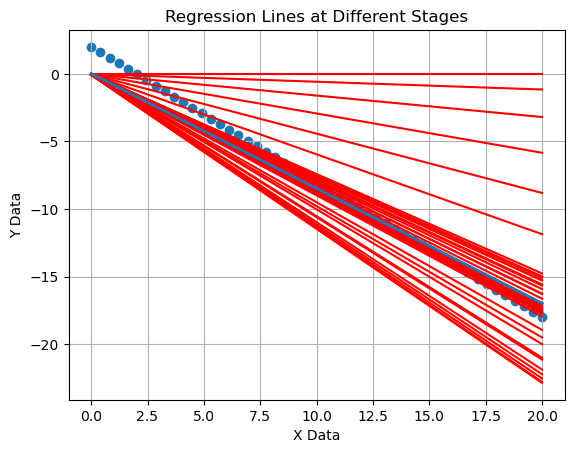

In [29]:
all_curve(X, y, at0, at1)

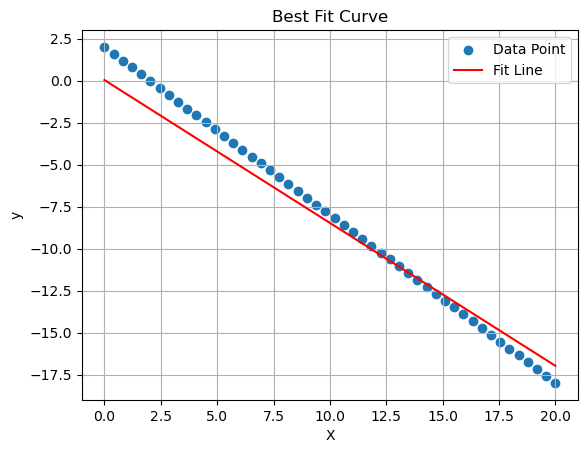

In [31]:
plt_best(X, y, y_pred)

# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  Adagrad


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions To Help Visualization

In [2]:

def theta_loss(at0, at1, c, lr):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    fig.suptitle('Ahmed Sharaf')
    theta = [at0, at1]
    for x in range(len(theta)):
        ax[x].plot(theta[x], c, '-o', label=f'Theta_{x} vs. Loss')
        ax[x].set_title(f'Theta_{x} vs. Loss with learning rate={lr}')
        ax[x].set_xlabel(f'Theta_{x}')
        ax[x].set_ylabel('Loss')
        ax[x].legend()
        ax[x].grid(True)
    fig.tight_layout()

def all_curve(X, y, at0, at1):
    plt.scatter(X, y);
    for x in range(len(at0)):
        y_pred = at0[x] + at1[x] * X
        plt.plot(X, y_pred,color='red')
    # final regression line
    plt.plot(X, y_pred, linewidth=2)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.grid(True)
    
def plt_best(X, y, y_pred):
    plt.scatter(X, y, label = "Data Point")
    plt.plot(X, y_pred, color = 'red', label = "Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Curve")
    plt.legend()
    plt.grid()
    
def loss_epoch(c):
    plt.plot(c, '-o',color='red')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.grid(True)
    
def vis(X, y, y_pred, at0, at1, c, lr):
    loss_epoch(c)
    theta_loss(at0, at1, c, lr)

In [3]:
def adagrad(X, y, lr = 0.01, beta = 0.9, ellipson = 1e-08 ,itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    h = []
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    v_t_0 = 0
    v_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        h.append(y)
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        if norm_grad < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
            
        v_t_0 = v_t_0 + (theta_0_grad ** 2)
        v_t_1 = v_t_1 + (theta_1_grad ** 2)
        
        theta_0 = theta_0 - ( lr / (np.sqrt(v_t_0) + ellipson))  * theta_0_grad
        theta_1 = theta_1 - ( lr / (np.sqrt(v_t_1) + ellipson))  * theta_1_grad 
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses, h

# Example

In [4]:
X = np.linspace(0,20)
y=-1*X+2


In [5]:
t0, t1, at0, at1, c, h = adagrad(X,y,0.05,1e-08,500)
y_pred = t0 + t1 * X

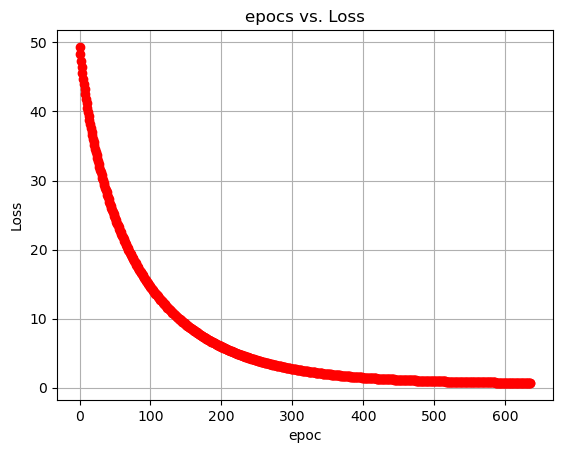

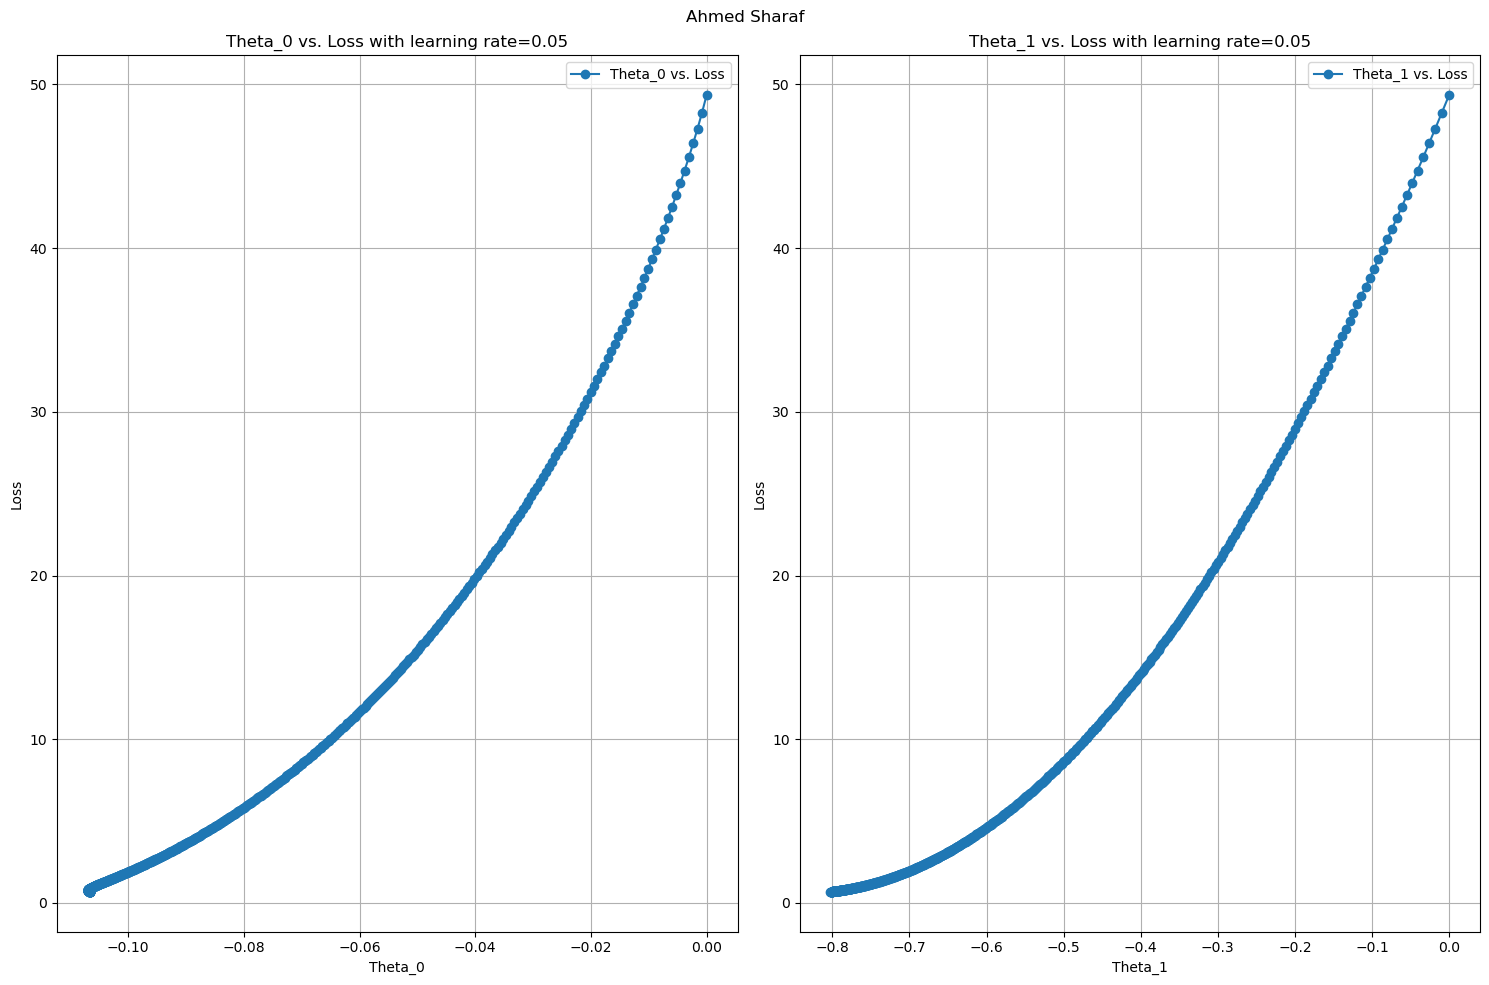

In [11]:
vis(X, y, y_pred, at0, at1, c, 0.05)

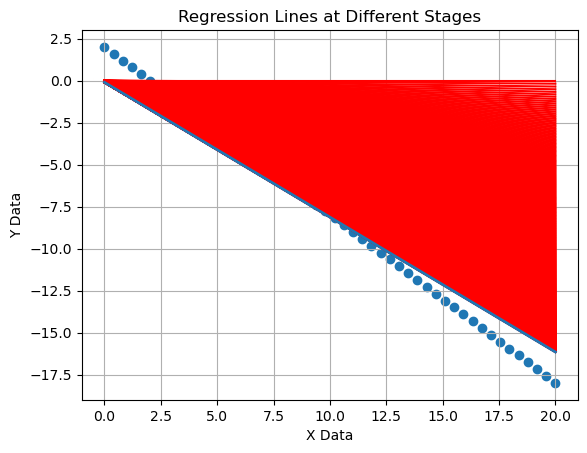

In [7]:
all_curve(X, y, at0, at1)

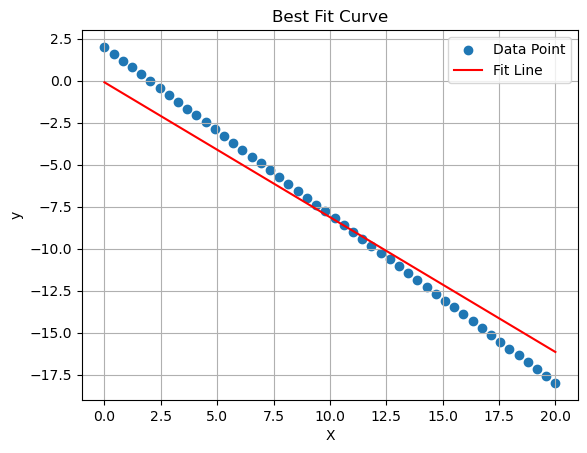

In [8]:
plt_best(X, y, y_pred)

###         2 - Implementation  RMSProp


In [12]:
def rmsprop(X, y, lr = 0.01, beta = 0.9, ellipson = 1e-08 ,itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    h = []
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    v_t_0 = 0
    v_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        h.append(y)
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        if norm_grad < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
            
        v_t_0 = (beta * v_t_0) + (1 - beta) * (theta_0_grad ** 2)
        v_t_1 = (beta * v_t_1) + (1 - beta) * (theta_1_grad ** 2)
        
        theta_0 = theta_0 - ( lr / (np.sqrt(v_t_0) + ellipson))  * theta_0_grad
        theta_1 = theta_1 - ( lr / (np.sqrt(v_t_1) + ellipson))  * theta_1_grad 
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses, h

## Example

In [18]:
t0, t1, at0, at1, c, h = rmsprop(X, y, 0.05,0.9,1e-08, itteration=500)
y_pred = t0 + t1 * X

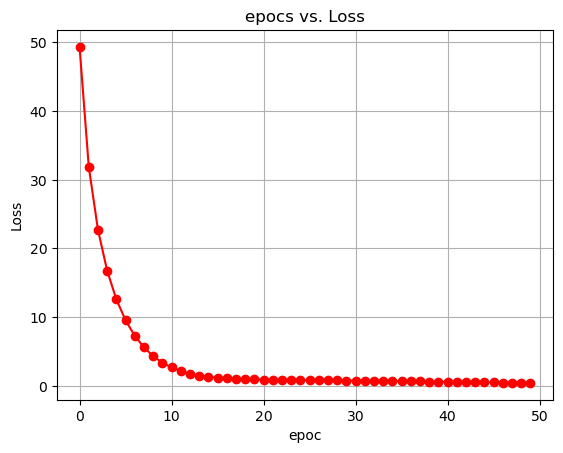

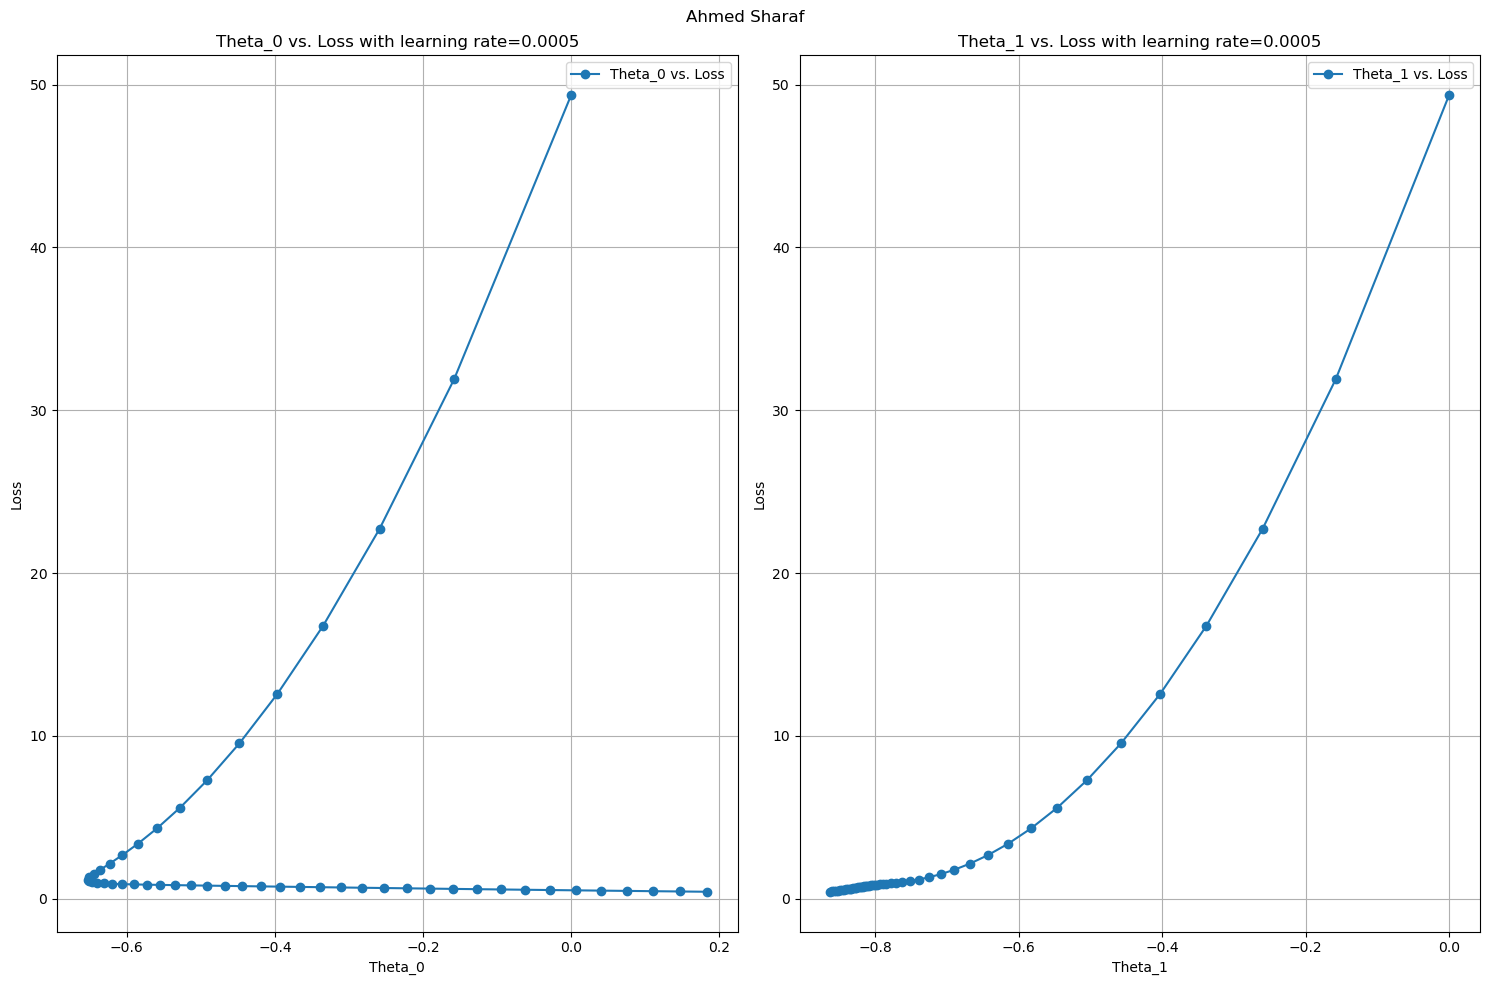

In [19]:
vis(X, y, y_pred, at0[:50], at1[:50], c[:50], 0.0005)

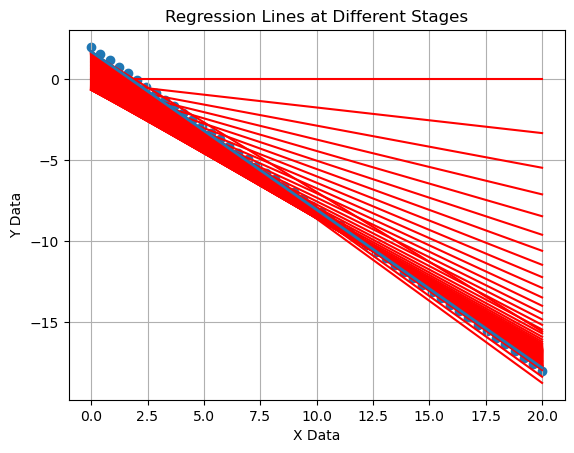

In [20]:
all_curve(X, y, at0, at1)

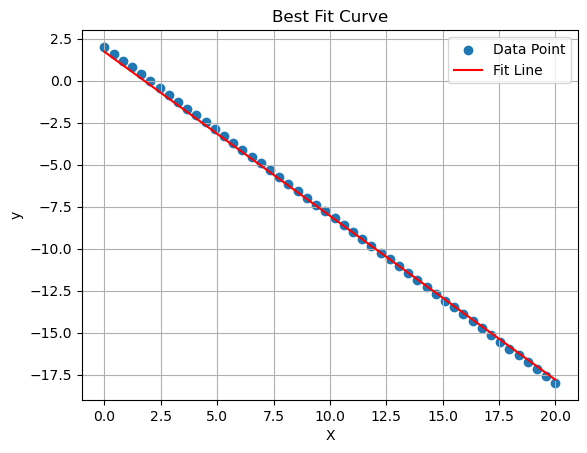

In [21]:
plt_best(X, y, y_pred)

###         2 - Implementation  Adam


In [22]:
def adam(X, y, lr = 0.01, beta1 = 0.9, beta2 = 0.9, ellipson = 1e-08 ,itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    h = []
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    v_t_0 = 0
    v_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        h.append(y)
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        if norm_grad < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
        
        m_t_0 = (beta1 * m_t_0) + (1 - beta1) * (theta_0_grad)
        m_t_1 = (beta1 * m_t_1) + (1 - beta1) * (theta_1_grad)
            
        v_t_0 = (beta2 * v_t_0) + (1 - beta2) * (theta_0_grad ** 2)
        v_t_1 = (beta2 * v_t_1) + (1 - beta2) * (theta_1_grad ** 2)
        
        m_hat_0 = m_t_0 / (1 - (beta1 ** (i + 1)))
        m_hat_1 = m_t_1 / (1 - (beta1 ** (i + 1)))
        
        v_hat_0 = v_t_0 / (1 - (beta2 ** (i + 1)))
        v_hat_1 = v_t_1 / (1 - (beta2 ** (i + 1)))
        
        theta_0 = theta_0 - ( lr / (np.sqrt(v_hat_0) + ellipson))  * m_hat_0
        theta_1 = theta_1 - ( lr / (np.sqrt(v_hat_1) + ellipson))  * m_hat_1 
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses, h

In [23]:
t0, t1, at0, at1, c, h = adam(X, y, 0.05, 0.2,0.7, 1e-08, itteration=500)
y_pred=t0+t1*X


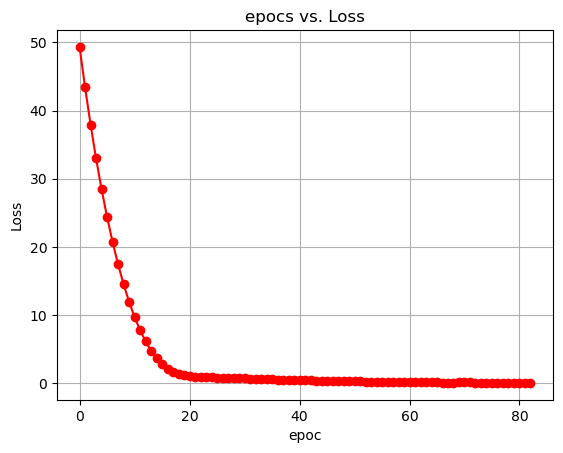

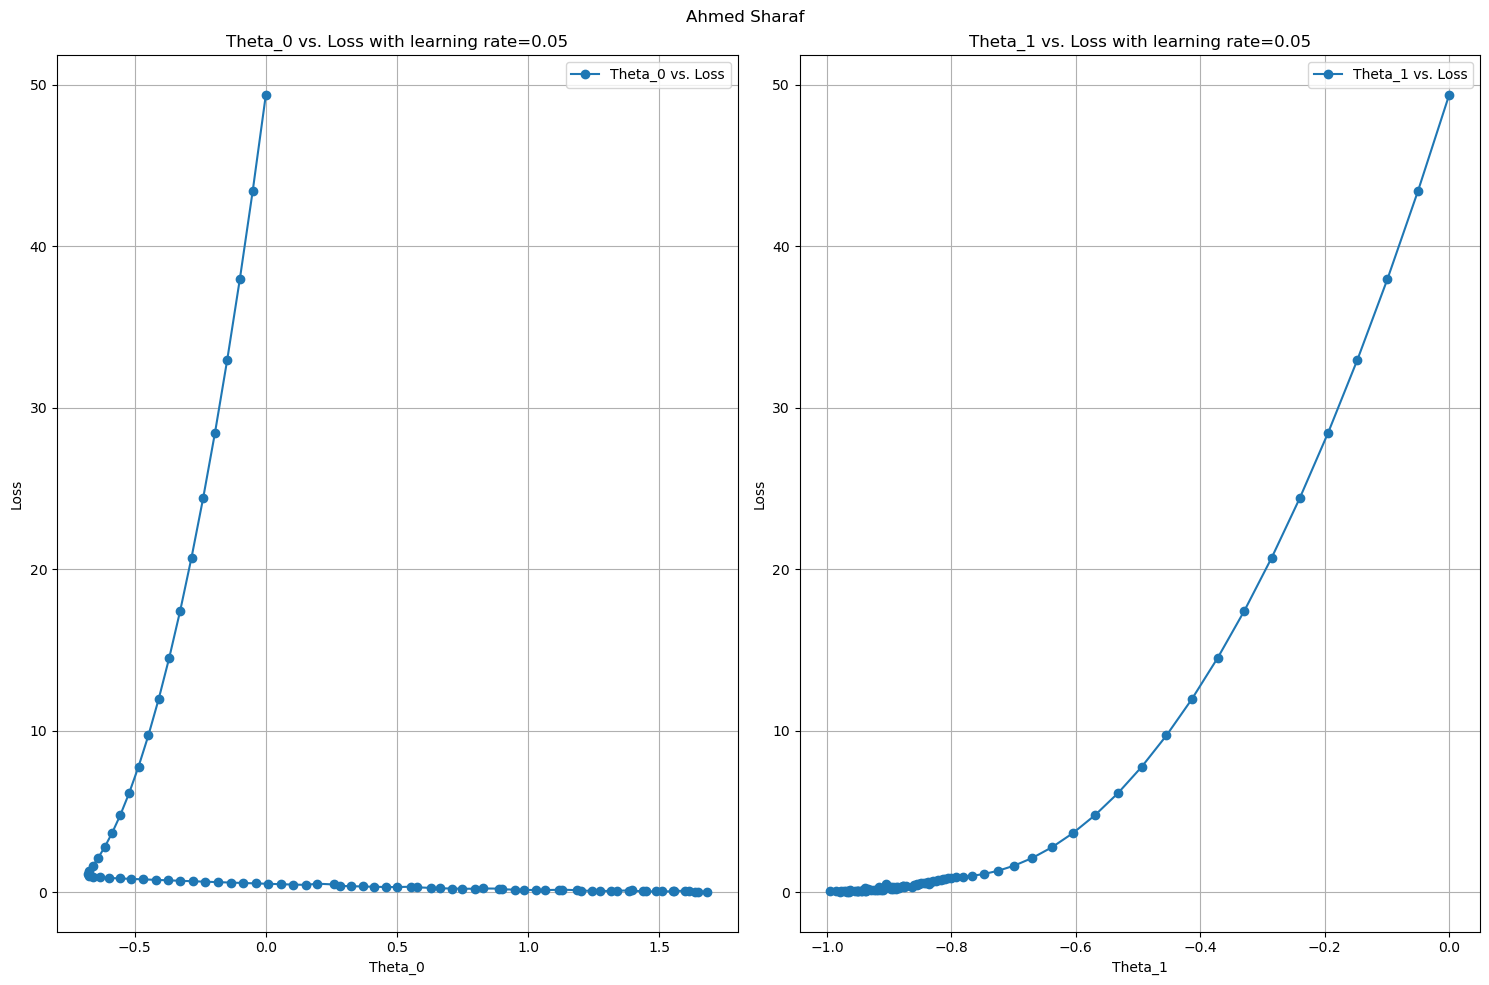

In [25]:
vis(X, y, y_pred, at0, at1, c, 0.05)

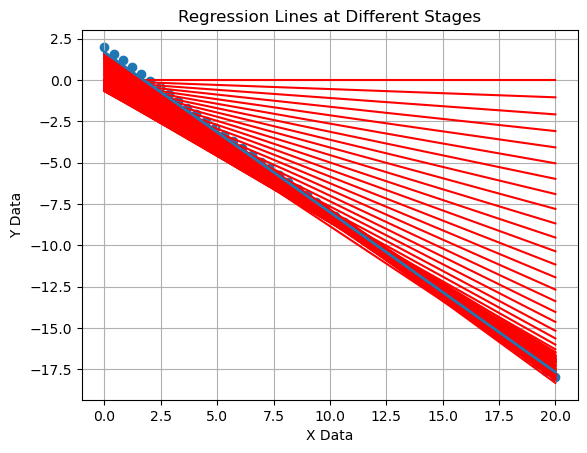

In [26]:
all_curve(X, y, at0, at1)

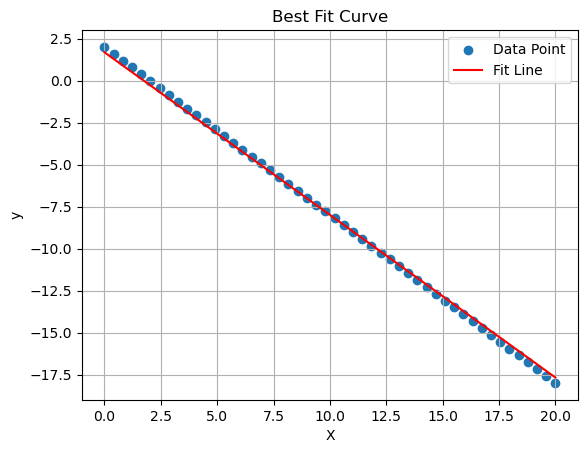

In [28]:
plt_best(X, y, y_pred)